# Regularized Method for Regression

Some examples:

* [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
* [Least Absolute Shrinkage and Selection Operator (LASSO)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

## Ridge Regression
Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

$\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.

***

Shows the effect of collinearity in the coefficients of an estimator.

Ridge Regression is the estimator used in this example. Each color represents a different feature of the coefficient vector, and this is displayed as a function of the regularization parameter.

This example also shows the usefulness of applying Ridge regression to highly ill-conditioned matrices. For such matrices, a slight change in the target variable can cause huge variances in the calculated weights. In such cases, it is useful to set a certain regularization (alpha) to reduce this variation (noise).

In [ ]:
#Se importan librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#Se imprimen las versiones de las librerías importadas y se importan otras librerias
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

2.0.2
2.2.3
3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:07:43) [MSC v.1942 64 bit (AMD64)]
1.6.1


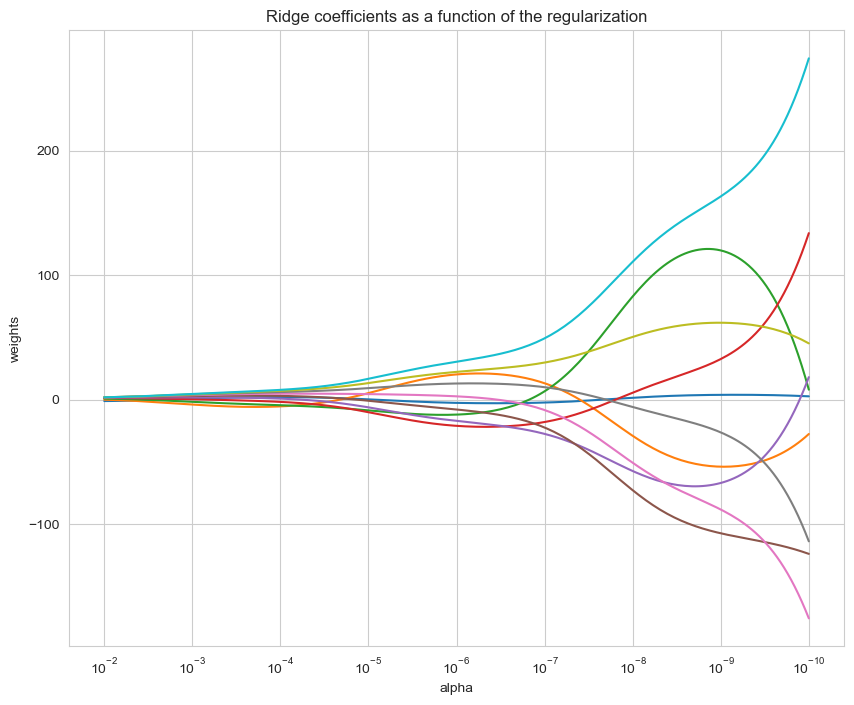

In [3]:
#Se importan unas cuantas librerías más
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# Genera la matriz de Hilbert 10x10.
# La matriz de Hilbert es conocida por ser mal condicionada, lo que la hace útil para demostrar la regularización.
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10) # Crea un vector de 1s para ser usado como la variable objetivo (y).

# ###########################################################################
# Compute paths # Calcula los caminos de regularización (coeficientes para diferentes valores de alpha)


n_alphas = 200 # Define el número de valores de alpha a probar.
alphas = np.logspace(-10, -2, n_alphas) # Genera una secuencia logarítmica de valores de alpha entre 10^-10 y 10^-2.
# alpha es el parámetro de regularización en la regresión Ridge.

coefs = [] # Crea una lista vacía para almacenar los coeficientes de la regresión Ridge para cada valor de alpha.
for a in alphas: # Itera sobre cada valor de alpha.
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False) # Crea una instancia del modelo Ridge con el valor de alpha actual y sin intercepto (fit_intercept=False).
    # La matriz de Hilbert es muy sensible, por lo que el intercepto podría causar inestabilidad.
    ridge.fit(X, y)  # Ajusta el modelo Ridge a los datos X e y.
    coefs.append(ridge.coef_) # Agrega los coeficientes del modelo Ridge a la lista coefs.


# ###########################################################################
# Display results

plt.figure(figsize=(10,8))
ax = plt.gca() 

ax.plot(alphas, coefs) # Traza los coeficientes en función de alpha.
# Cada línea representa un coeficiente para una característica diferente.
ax.set_xscale('log') # Establece la escala del eje x como logarítmica.
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis # Invierte el eje x para que alpha aumente de derecha a izquierda.
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## LASSO Regression

A linear model that estimates sparse coefficients.

Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.

## Elastic Net

A linear regression model trained with L1 and L2 prior as regularizer. 

This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$





***

# Outliers Impact 

In [13]:
#Importa librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline #Se agrega la importacion de pipeline

## Linear Regression

In [5]:
#Importa el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

Coefficient Estimate:  [0.47134857]


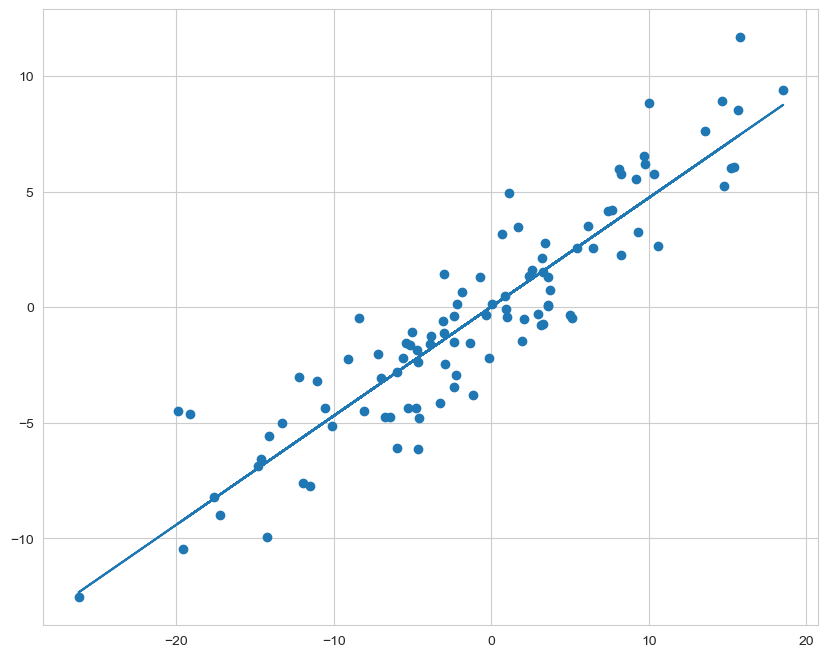

In [6]:
np.random.seed(42) # Establece la semilla aleatoria para reproducibilidad.
n_samples = 100 # Define el número de muestras a generar.
rng = np.random.randn(n_samples) * 10 # Genera un array de números aleatorios normales (distribución gaussiana) con una desviación estándar de 10.
# Esto simula una variable independiente (rng) con cierta variabilidad.
y_gen = 0.5 * rng + 2 * np.random.randn(n_samples) # Genera la variable dependiente (y_gen) basada en rng con ruido aleatorio añadido.
# La relación lineal subyacente es y = 0.5 * rng + ruido.
# El ruido se genera como números aleatorios normales multiplicados por 2.

lr = LinearRegression() # Crea una instancia del modelo de regresión lineal.
lr.fit(rng.reshape(-1, 1), y_gen) # Ajusta el modelo de regresión lineal a los datos. rng.reshape(-1, 1) transforma el array 1D rng en una matriz 2D con una sola columna.
# Esto es necesario porque sklearn espera que la variable independiente sea una matriz 2D.
model_pred = lr.predict(rng.reshape(-1,1)) # Realiza predicciones utilizando el modelo ajustado.

#Genera el grafico de los datos
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, model_pred);
print("Coefficient Estimate: ", lr.coef_) # Imprime el coeficiente estimado por el modelo de regresión lineal.
# Este coeficiente representa la pendiente de la línea de regresión.

In [7]:
idx = rng.argmax() # Encuentra el índice del valor máximo en rng.
y_gen[idx] = 200 # Establece el valor de y_gen en el índice máximo de rng a 200. Esto introduce un valor atípico (outlier) en la parte superior de los datos.
idx = rng.argmin() # Encuentra el índice del valor mínimo en rng.
y_gen[idx] = -200

Coefficient Estimate:  [13.60449019]


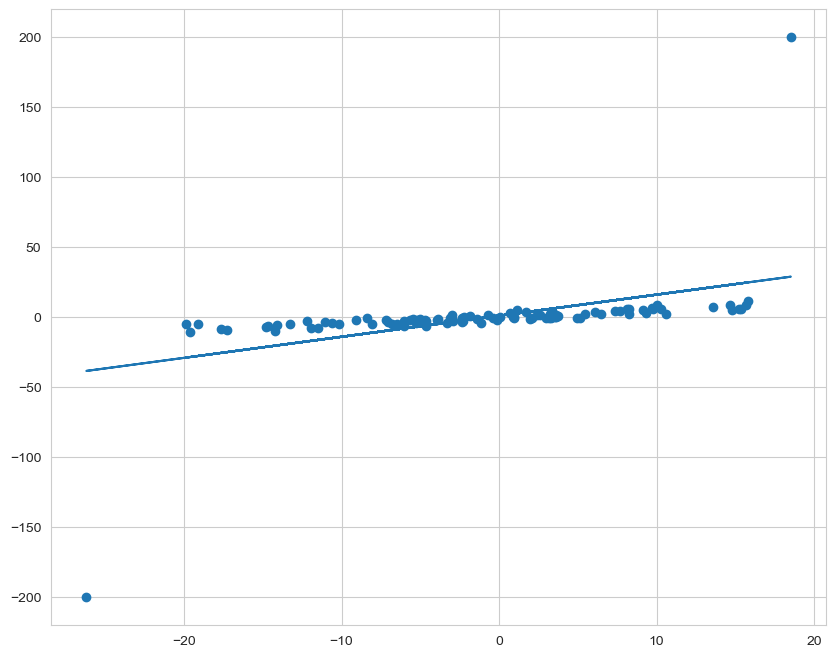

In [14]:
#Crea el gráfico de los datos
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);

# Crea un pipeline que incluye la normalización y el modelo de regresión lineal.
model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(rng.reshape(-1, 1), y_gen) # Ajusta el modelo de regresión lineal a los datos.rng.reshape(-1, 1) transforma el array 1D rng en una matriz 2D con una sola columna.
# Esto es necesario porque sklearn espera que la variable independiente sea una matriz 2D.
o_model_pred = model.predict(rng.reshape(-1,1)) # Realiza predicciones utilizando el modelo ajustado.

plt.plot(rng, o_model_pred);
print("Coefficient Estimate: ", model.named_steps['linearregression'].coef_)  #Imprime el coeficiente estimado por el modelo de regresión lineal.
# Este coeficiente representa la pendiente de la línea de regresión.

## Ridge Regression

In [9]:
#Importa el modelo Ridge de sklearn
from sklearn.linear_model import Ridge

Coefficient Estimate:  [13.53680616]


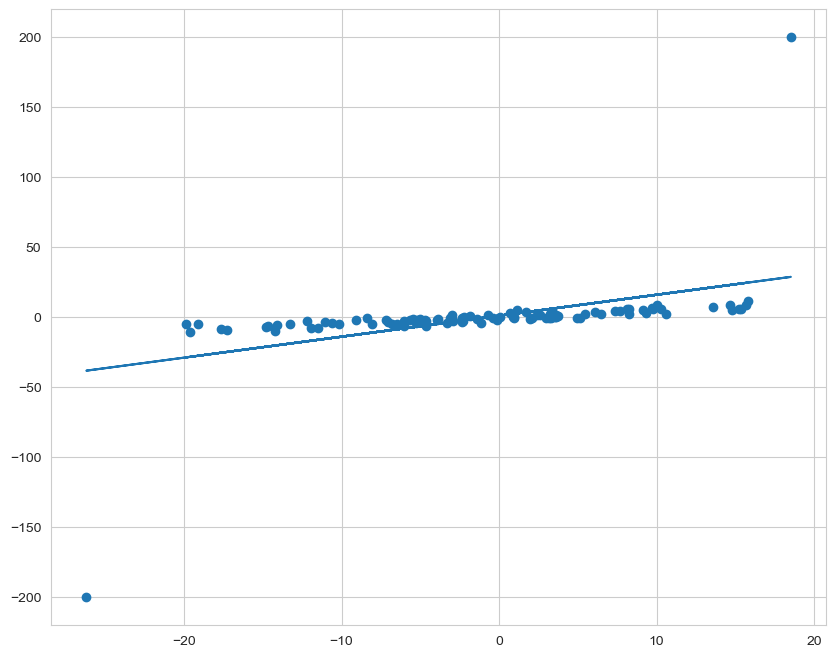

In [15]:
# Crea un pipeline que incluye la normalización y el modelo de regresión Ridge.
model = make_pipeline(StandardScaler(), Ridge(alpha=0.5))

model.fit(rng.reshape(-1, 1), y_gen) # Ajusta el modelo de regresión Ridge a los datos.
ridge_model_pred = model.predict(rng.reshape(-1,1))

#Crea el gráfico de los datos
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, ridge_model_pred);
print("Coefficient Estimate: ", model.named_steps['ridge'].coef_)


## Lasso Regression

In [11]:
#Importa de linear model Lasso
from sklearn.linear_model import Lasso

Coefficient Estimate:  [13.20449019]


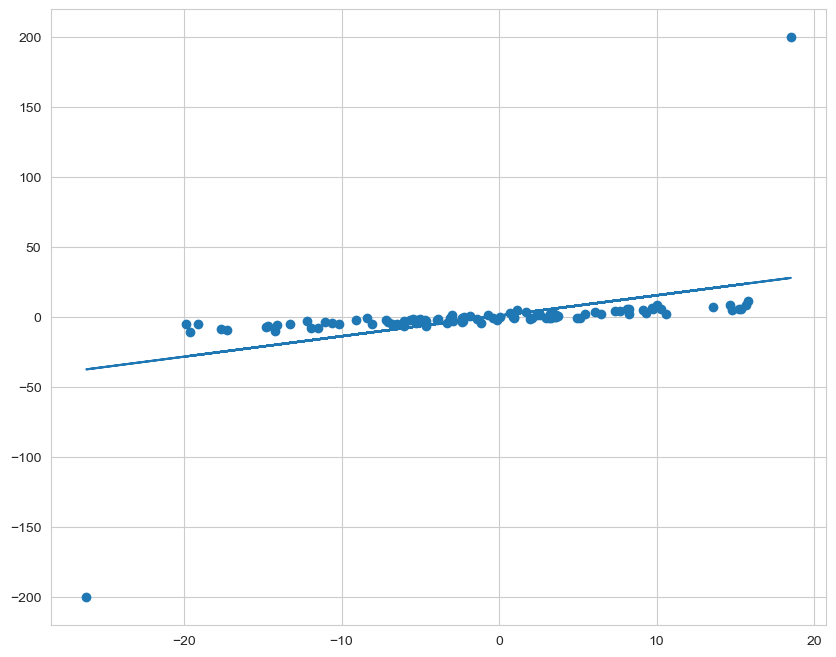

In [16]:
# Crea un pipeline que incluye la normalización y el modelo de regresión Lasso.
model = make_pipeline(StandardScaler(), Lasso(alpha=0.4))

model.fit(rng.reshape(-1, 1), y_gen)
lasso_model_pred = model.predict(rng.reshape(-1,1))

#Crea el gráfico con los datos
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, lasso_model_pred);
print("Coefficient Estimate: ", model.named_steps['lasso'].coef_)

## Elastic Net Regression

In [17]:
#De sklearn importa el modelo elasticnet
from sklearn.linear_model import ElasticNet

Coefficient Estimate:  [13.45989127]


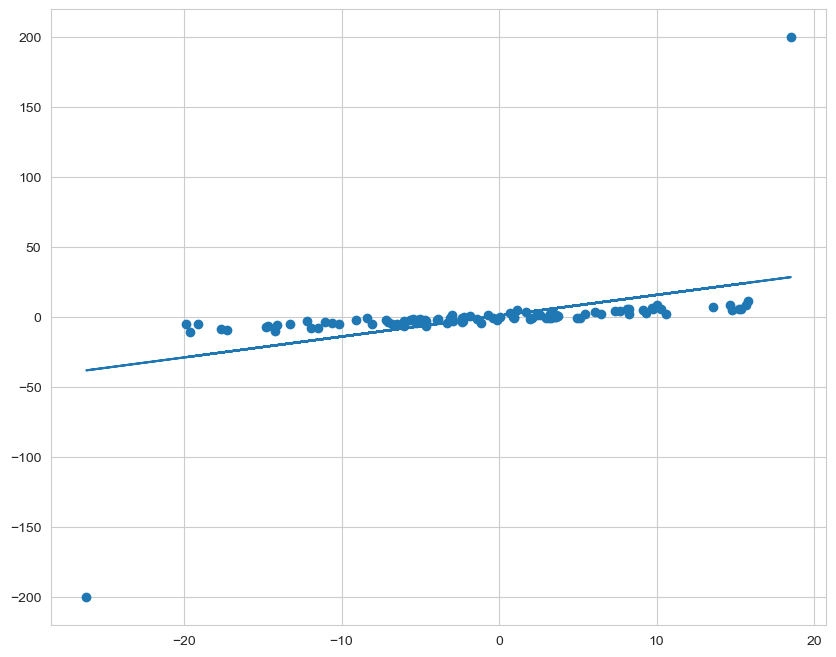

In [19]:
# Crea un pipeline que incluye la normalización y el modelo de regresión Elastic Net.
model = make_pipeline(StandardScaler(), ElasticNet(alpha=0.02))

model.fit(rng.reshape(-1, 1), y_gen)
en_model_pred = model.predict(rng.reshape(-1,1))

#Crea el grafico con los datos
plt.figure(figsize=(10,8));
plt.scatter(rng, y_gen);
plt.plot(rng, en_model_pred);
print("Coefficient Estimate: ", model.named_steps['elasticnet'].coef_)

***

# Summary

[Question in StackExchange](https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge)

**When should I use Lasso, Ridge or Elastic Net?**

* **Ridge regression** can't zero out coefficients; You either end up including all the coefficients in the model, or none of them. 

* **LASSO** does both parameter shrinkage and variable selection automatically. 

* If some of your covariates are highly correlated, you may want to look at the **Elastic Net** instead of the LASSO.

# Other References

1. [The Lasso Page](http://statweb.stanford.edu/~tibs/lasso.html)

2. [A simple explanation of the Lasso and Least Angle Regression](http://statweb.stanford.edu/~tibs/lasso/simple.html)

3. [The Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

***